['Afghanistan', 'Albania', 'Angola', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia & Herz', 'Burkina Faso', 'Burundi', 'CAR', 'Cambodia', 'Cameroun', 'Chad', 'China', 'Comoros', 'Congo', 'Congo DRC', 'Cuba', "Côte d'Ivoire", 'Djibouti', 'Eritrea', 'Ethiopia', 'Gambia', 'Georgia', 'Ghana', 'Guinea', 'Guinea Bissau', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Kenya', 'Kiribati', 'Korea DPR', 'Kyrgyz Rep', 'Lao PDR', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Moldova', 'Mongolia', 'Mozambique', 'Myanmar', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Papua NG', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Isl', 'Somalia', 'Sri Lanka', 'Sudan South', 'Sudan, Republic of', 'Sâo Tomé', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Turkmenistan', 'Uganda', 'Ukraine', 'Uzbekistan', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']
Afghanistan
Albania
Angola
Armenia
Azerbaijan
Bangladesh
Benin
Bhutan
Bolivia
Burkina Faso


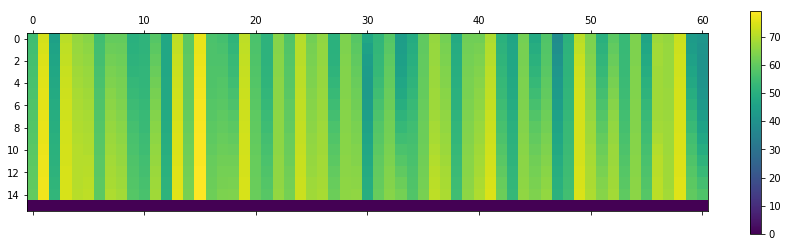

['Afghanistan', 'Albania', 'Angola', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia & Herz', 'Burkina Faso', 'Burundi', 'CAR', 'Cambodia', 'Cameroun', 'Chad', 'China', 'Comoros', 'Congo', 'Congo DRC', 'Cuba', "Côte d'Ivoire", 'Djibouti', 'Eritrea', 'Ethiopia', 'Gambia', 'Georgia', 'Ghana', 'Guinea', 'Guinea Bissau', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Kenya', 'Kiribati', 'Korea DPR', 'Kyrgyz Rep', 'Lao PDR', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Moldova', 'Mongolia', 'Mozambique', 'Myanmar', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Papua NG', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Isl', 'Somalia', 'Sri Lanka', 'Sudan South', 'Sudan, Republic of', 'Sâo Tomé', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Turkmenistan', 'Uganda', 'Ukraine', 'Uzbekistan', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide


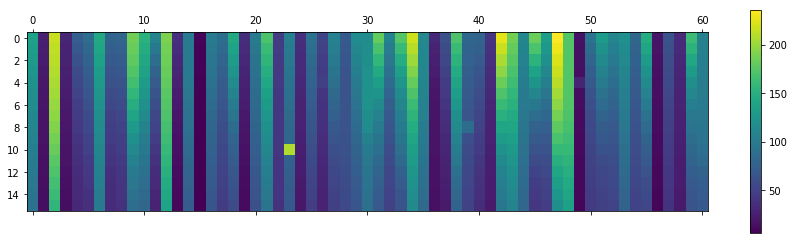

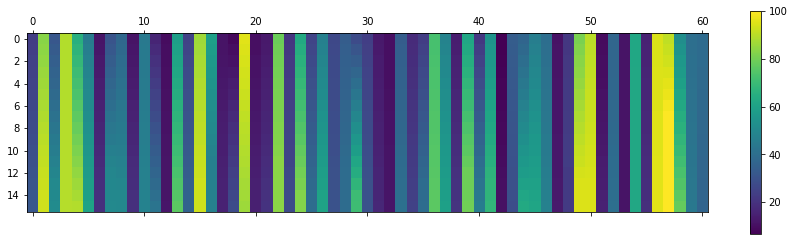

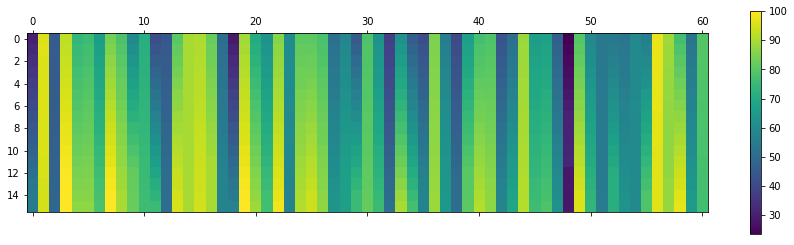

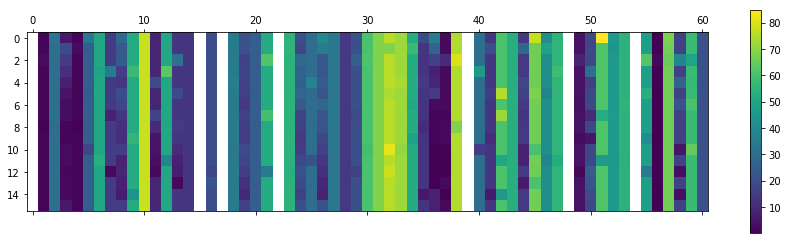

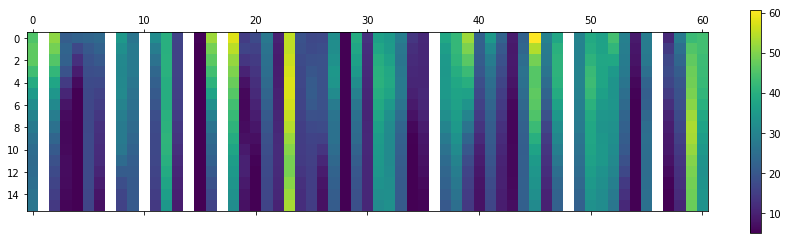

In [10]:
import csv
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

years = range(2000,2016)   # for data


def convert_to_float(data):
    data = np.array(data)
    idx = np.where(data == '')
    data[idx] = 0
    idx = np.where(data == '..')
    data[idx] = 0
    data = data.astype(float)
    row_means = np.true_divide(data.sum(1),(data!=0).sum(1))
    for i in range(data.shape[0]):
        idx = np.where(data[i,:] == 0)
        data[i,idx] = row_means[i]
    return data

    
    
file_path_ngo_budget = 'Data/NGO_DataDisbursement.csv'
ngo_file = open(file_path_ngo_budget, 'r')
reader = csv.DictReader(ngo_file)
countries = []
for row in reader:
    countries.append(row['Country'])
    
countries = list(set(countries))
countries = sorted(countries)
print(countries)


file_path_l_e = 'life_exp.csv'
le_file = open(file_path_l_e, 'r')
reader = csv.DictReader(le_file)
reader = sorted(reader, key=lambda d: d['Country Name'])
data_l_e = []
for row in reader:
    if row['Country Name'] not in countries:
        continue
    print(row['Country Name'])
    rows = [row[str(y)] for y in years ]
    data_l_e.append(rows)
    
    
f = 'Data/child_mort.csv'
ff = open(f, 'r')
reader = csv.DictReader(ff)
reader = sorted(reader, key=lambda d: d['Country Name'])
data_ch_m = []
for row in reader:
    if row['Country Name'] not in countries:
        continue
    rows = [row[str(y)+' [YR'+str(y)+']'] for y in years ]
    data_ch_m.append(rows)
    
    
file_population = 'Data/population.csv'   
pop_file = open(file_population, 'r')
reader = csv.DictReader(pop_file)
reader = sorted(reader, key=lambda d: d['Country Name'])
data_pop = []
#2000 [YR2000]
for row in reader:
    if row['Country Name'] not in countries:
        continue
    rows = [row[str(y)+' [YR'+str(y)+']'] for y in years ]
    
    data_pop.append(rows)
    
    

f = 'Data/sanitation.csv'
ff = open(f, 'r')
reader = csv.DictReader(ff)
reader = sorted(reader, key=lambda d: d['Country Name'])
data_san = []
for row in reader:
    if row['Country Name'] not in countries:
        continue
    rows = [row[str(y)] for y in years ]
    data_san.append(rows)   
    

f = 'Data/water.csv'
ff = open(f, 'r')
reader = csv.DictReader(ff)
reader = sorted(reader, key=lambda d: d['Country Name'])
data_water = []
for row in reader:
    if row['Country Name'] not in countries:
        continue
    rows = [row[str(y)] for y in years ]
    data_water.append(rows) 
    
    
f = 'Data/poverty.csv'
ff = open(f, 'r')
reader = csv.DictReader(ff)
reader = sorted(reader, key=lambda d: d['Country Name'])
data_poverty = []
for row in reader:
    if row['Country Name'] not in countries:
        continue
    rows = [row[str(y)+' [YR'+str(y)+']'] for y in years ]
    data_poverty.append(rows)    
    
    
f = 'Data/prevalence.csv'
ff = open(f, 'r')
reader = csv.DictReader(ff)
reader = sorted(reader, key=lambda d: d['Country Name'])
data_prel = []
for row in reader:
    if row['Country Name'] not in countries:
        continue
    rows = [row[str(y)+' [YR'+str(y)+']'] for y in years ]
    data_prel.append(rows)   
    
#print(data)
data_l_e = np.array(data_l_e)
idx = np.where(data_l_e == '')
data_l_e[idx] = 0
data_l_e = data_l_e.astype(float)
data_l_e = data_l_e.T
plt.matshow(data_l_e)
plt.colorbar()
plt.show()
#print(data)

print(countries)

data_pop = convert_to_float(data_pop)
data_ch_m = convert_to_float(data_ch_m)
data_san = convert_to_float(data_san)
data_water = convert_to_float(data_water)
data_poverty = convert_to_float(data_poverty)
data_prel = convert_to_float(data_prel)
#data_ch_m = np.multiply(data_ch_m, data_pop) # abs valus
#data_san = np.multiply(data_san, data_pop) # abs valus
#data_ch_m = data_ch_m * 0.001
#data_san = data_san * 0.01


data_ch_m = data_ch_m.T
plt.matshow(data_ch_m)
plt.colorbar()
plt.show()

data_san = data_san.T
plt.matshow(data_san)
plt.colorbar()
plt.show()
data_water = data_water.T
plt.matshow(data_water)
plt.colorbar()
plt.show()
data_poverty = data_poverty.T
plt.matshow(data_poverty)
plt.colorbar()
plt.show()
data_prel = data_prel.T
plt.matshow(data_prel)
plt.colorbar()
plt.show()

In [9]:
def regress(year_series, values, degree=2):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(year_series, values)
    new_val = model.predict(years[-1]+1)
    plt.plot(years[-1]+1, new_val)
    plt.show()
    return new_val

data = data_ch_m.T
for r in range(data.shape[0]):
    print(countries[r])
    res = regress(years, data[r,:])
    
    


Mongolia


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 16]